## Log data munging and EDA

Just getting set up, testing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import sys
sys.path.insert(0,'../')
import mysticbit
from mysticbit import munging, ml

In [4]:
df_logs = munging.load_log_data()
df_logs.head()

PSEUDO_DEPTH   TEMP   CALI     GR      ILD    NPHI    RHOB      DT  \
0       2074.53  87.19  10.31  55.08   3.3128  0.1678  2.3124  108.95   
1       2074.68  87.20  10.25  52.89   3.6592  0.1739  2.2895  110.91   
2       2074.83  87.20  10.20  52.54   4.1220  0.1618  2.2686  114.92   
3       2074.98  87.21  10.18  54.36   4.7189  0.1448  2.2533  119.66   
4       2075.90  87.24   9.76  48.13  13.0483  0.1085  2.0885  126.26   

       TVD    TVDSS    ...        PHIE    PHIT      SW  EF  PERFOS  RES_ID  \
0  1588.62  1566.62    ...      0.0591  0.2066  0.5863   5       0    3005   
1  1588.77  1566.77    ...      0.0871  0.2222  0.5225   5       0    3005   
2  1588.92  1566.92    ...      0.0730  0.2061  0.5004   5       0    3005   
3  1589.06  1567.06    ...      0.0335  0.1768  0.4566   5       0    3005   
4  1589.94  1567.94    ...      0.0331  0.1412  0.2211   1       1    3005   

     WELL_ID   X     Y  HACKANAME  
0  210075859  15  20.0        B03  
1  210075859  15  20.0        B03  
2  210075859  15  20.0        B03  
3  210075859  15  20.0        B03  
4  210075859  15  20.0        B03  

[5 rows x 21 columns]

C:\Users\Connor\AppData\Local\conda\conda\envs\mysticbit\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


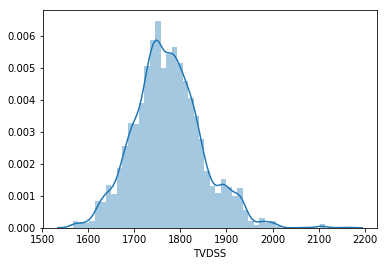

In [5]:
sns.distplot(df_logs.TVDSS)

In [6]:
df_logs.columns

Index(['PSEUDO_DEPTH', 'TEMP', 'CALI', 'GR', 'ILD', 'NPHI', 'RHOB', 'DT',
       'TVD', 'TVDSS', 'VCL', 'PHIE', 'PHIT', 'SW', 'EF', 'PERFOS', 'RES_ID',
       'WELL_ID', 'X', 'Y', 'HACKANAME'],
      dtype='object')

In [7]:
df_ml = munging.create_ml_dataframe(df_logs)
df_ml.head()

HACKANAME  TVDSS  RES_ID         GR   GR_lag_1   GR_lag_2   GR_lag_3  \
0       B03   1569  3005.0  42.234286  36.278571  51.245000  53.503333   
1       B03   1570  3005.0  34.288000  42.234286  36.278571  51.245000   
2       B03   1571  3005.0  36.400000  34.288000  42.234286  36.278571   
3       B03   1572  3005.0  57.498000  36.400000  34.288000  42.234286   
4       B03   1581  3005.0  55.180000  57.498000  36.400000  34.288000   

   GR_futr_5  GR_futr_10  
0  49.958333   58.120000  
1  58.601429   57.525000  
2  51.303333   47.723333  
3  52.490000   49.120000  
4  53.040000   57.418571

In [9]:
df_ml_train, df_ml_test = ml.train_test_split(df_ml)

Train well:  {'B08', 'G06', 'B13', 'G070', 'G08', 'G12', 'G16', 'G15', 'B14', 'G10', 'B0700', 'B12', 'B200', 'G17', 'G09'}
Test wells:  {'B06', 'B05', 'B03'}


In [10]:
from sklearn.model_selection import LeavePGroupsOut

# Cross validation

X_train = df_ml_train[['GR', 'GR_lag_1']]
y_train = df_ml_train['GR_futr_5']
grps_train = df_ml_train['HACKANAME']

cv = LeavePGroupsOut(2)
n_splits = cv.get_n_splits(X_train, y_train, grps_train)
n_splits

105